## Sales Analysis with Prophet, Seasonality, Arima

In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', None)

salesdetail_montly = pd.read_csv('salesdetailmonthly_20240425_050244975.csv')

salesdetail_montly

C:\Users\wndows\AppData\Local\Temp\ipykernel_19804\1547539662.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\wndows\AppData\Local\Temp\ipykernel_19804\1547539662.py:4: DtypeWarning: Columns (2,9,58,84,97,98,104,110,111,137,167,184,186) have mixed types. Specify dtype option on import or set low_memory=False.
  salesdetail_montly = pd.read_csv('salesdetailmonthly_20240425_050244975.csv')


,RegionName,StoreName,AlternateStoreCode,StoreGSTNumber,BillDate,BillTime,BillNumber,CustomerCode,CustomerName,CustomerGSTNumber,...,BillRemarks,AlternateCode2,PurchaseUnit,BulkDescription,ItemCost,CostOfSale,PackageInformation,ProviderTaxCode,TaxPercentage,ProductFullName
0,GUJARAT,MEDKART A STADIUM,2,24AAMCM5391B1ZI,01/04/2024,9:27AM,SC1,487202.0,MINESH PANDYA,NaN,...,NaN,NaN,1,NaN,0,0,TABLET,NaN,12,CLONIDIME 100MCG TAB 1X30
1,GUJARAT,MEDKART A STADIUM,2,24AAMCM5391B1ZI,01/04/2024,9:27AM,SC1,487202.0,MINESH PANDYA,NaN,...,NaN,NaN,1,NaN,0,0,TABLET,NaN,12,CILNIMERIT 20MG TAB 1X10
2,GUJARAT,MEDKART A STADIUM,2,24AAMCM5391B1ZI,01/04/2024,10:14AM,SC2,776.0,MEHTAB RANGWALA,NaN,...,NaN,NaN,1,NaN,0,0,CAPSULE,NaN,12,CALCIQUICK D31K CAP 1X10
3,GUJARAT,MEDKART A STADIUM,2,24AAMCM5391B1ZI,01/04/2024,10:14AM,SC2,776.0,MEHTAB RANGWALA,NaN,...,NaN,NaN,1,NaN,0,0,CAPSULE,NaN,12,CALCIQUICK D31K CAP 1X10
4,GUJARAT,MEDKART A STADIUM,2,24AAMCM5391B1ZI,01/04/2024,10:14AM,SC2,776.0,MEHTAB RANGWALA,NaN,...,NaN,NaN,1,NaN,0,0,TABLET,NaN,12,CETJOINT FORTE TAB 1X30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257890,GUJARAT,CURE PHARMACY,676,24AARFC9888M1ZC,24/04/2024,8:10PM,SR8,10500.0,AKSHAY DALAL,NaN,...,NaN,NaN,1,NaN,0,0,DROPS,NaN,12,SYSTANE ULTRA DROPS 10ML
257891,GUJARAT,J M AND K ENTERPRISES,682,24GONPP7240L1ZB,24/04/2024,10:42PM,SR6,779460.0,viral bharvad,NaN,...,NaN,NaN,1,NaN,0,0,TABLET,NaN,18,NICOTEX 4MG TAB 1X29
257892,GUJARAT,MEDKART AN GAMDIVAD,78,24AAMCM5937B1ZI,24/04/2024,11:59AM,SR6,915043.0,NITABEN SONI,NaN,...,NaN,NaN,1,NaN,0,0,DIAPER,NaN,12,DIAPER ADULT MEDIUM
257893,GUJARAT,MEDKART A SURELIYA ESTATE,80,24AAMCM5391B1ZI,24/04/2024,11:43AM,SR10,919027.0,bharat bhai,NaN,...,NaN,NaN,1,NaN,0,0,TABLET,NaN,12,TELSAR 40MG TAB 1X15


In [3]:
salesdetail_montly.columns

Index(['RegionName', 'StoreName', 'AlternateStoreCode', 'StoreGSTNumber',
       'BillDate', 'BillTime', 'BillNumber', 'CustomerCode', 'CustomerName',
       'CustomerGSTNumber',
       ...
       'BillRemarks', 'AlternateCode2', 'PurchaseUnit', 'BulkDescription',
       'ItemCost', 'CostOfSale', 'PackageInformation', 'ProviderTaxCode',
       'TaxPercentage', 'ProductFullName'],
      dtype='object', length=196)

In [4]:
salesdetail_montly.describe()

,CustomerCode,Quantity,FreeQty,FreeMRPValue,BaseValue,OtherTax,TNGSTAmount,CST,SGST,CGST,...,ProductImage,AlphaBatchID,OrderReference,AlternateCode2,PurchaseUnit,BulkDescription,ItemCost,CostOfSale,ProviderTaxCode,TaxPercentage
count,257804.000000,257895.000000,257895.0,257895.0,257895.000000,257895.0,257895.0,257895.0,257895.000000,257895.000000,...,0.0,0.0,0.0,0.0,257895.0,0.0,257895.0,257895.0,0.0,257895.000000
mean,421839.185695,2.160263,0.0,0.0,104.172366,0.0,0.0,0.0,6.019480,6.019480,...,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,11.823692
std,294125.257804,5.892535,0.0,0.0,214.906541,0.0,0.0,0.0,12.038401,12.038401,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,2.571055
min,3.000000,-142.000000,0.0,0.0,-32825.895000,0.0,0.0,0.0,-1969.553600,-1969.553589,...,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,0.000000
25%,159735.000000,1.000000,0.0,0.0,31.355932,0.0,0.0,0.0,1.767900,1.767900,...,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,12.000000
50%,374680.000000,1.000000,0.0,0.0,62.500000,0.0,0.0,0.0,3.602400,3.602400,...,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,12.000000
75%,679816.000000,3.000000,0.0,0.0,119.910710,0.0,0.0,0.0,7.149100,7.149100,...,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,12.000000
max,919405.000000,720.000000,0.0,0.0,32825.895000,0.0,0.0,0.0,1969.553600,1969.553589,...,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,18.000000


## Drop Unnecessary columns

In [5]:
salesdetail_montly.dropna(axis=1, how='all')

,RegionName,StoreName,AlternateStoreCode,StoreGSTNumber,BillDate,BillTime,BillNumber,CustomerCode,CustomerName,CustomerGSTNumber,...,IsBudgetedDiscount,New customer Type,StoreAbbrevation,BillRemarks,PurchaseUnit,ItemCost,CostOfSale,PackageInformation,TaxPercentage,ProductFullName
0,GUJARAT,MEDKART A STADIUM,2,24AAMCM5391B1ZI,01/04/2024,9:27AM,SC1,487202.0,MINESH PANDYA,NaN,...,No,EXISTING,SA,NaN,1,0,0,TABLET,12,CLONIDIME 100MCG TAB 1X30
1,GUJARAT,MEDKART A STADIUM,2,24AAMCM5391B1ZI,01/04/2024,9:27AM,SC1,487202.0,MINESH PANDYA,NaN,...,No,EXISTING,SA,NaN,1,0,0,TABLET,12,CILNIMERIT 20MG TAB 1X10
2,GUJARAT,MEDKART A STADIUM,2,24AAMCM5391B1ZI,01/04/2024,10:14AM,SC2,776.0,MEHTAB RANGWALA,NaN,...,No,EXISTING,SA,NaN,1,0,0,CAPSULE,12,CALCIQUICK D31K CAP 1X10
3,GUJARAT,MEDKART A STADIUM,2,24AAMCM5391B1ZI,01/04/2024,10:14AM,SC2,776.0,MEHTAB RANGWALA,NaN,...,No,EXISTING,SA,NaN,1,0,0,CAPSULE,12,CALCIQUICK D31K CAP 1X10
4,GUJARAT,MEDKART A STADIUM,2,24AAMCM5391B1ZI,01/04/2024,10:14AM,SC2,776.0,MEHTAB RANGWALA,NaN,...,No,EXISTING,SA,NaN,1,0,0,TABLET,12,CETJOINT FORTE TAB 1X30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257890,GUJARAT,CURE PHARMACY,676,24AARFC9888M1ZC,24/04/2024,8:10PM,SR8,10500.0,AKSHAY DALAL,NaN,...,No,EXISTING,NaN,NaN,1,0,0,DROPS,12,SYSTANE ULTRA DROPS 10ML
257891,GUJARAT,J M AND K ENTERPRISES,682,24GONPP7240L1ZB,24/04/2024,10:42PM,SR6,779460.0,viral bharvad,NaN,...,No,EXISTING,NaN,NaN,1,0,0,TABLET,18,NICOTEX 4MG TAB 1X29
257892,GUJARAT,MEDKART AN GAMDIVAD,78,24AAMCM5937B1ZI,24/04/2024,11:59AM,SR6,915043.0,NITABEN SONI,NaN,...,No,EXISTING,NaN,NaN,1,0,0,DIAPER,12,DIAPER ADULT MEDIUM
257893,GUJARAT,MEDKART A SURELIYA ESTATE,80,24AAMCM5391B1ZI,24/04/2024,11:43AM,SR10,919027.0,bharat bhai,NaN,...,No,NEW,NaN,NaN,1,0,0,TABLET,12,TELSAR 40MG TAB 1X15


In [6]:
salesdetail_montly.describe()

,CustomerCode,Quantity,FreeQty,FreeMRPValue,BaseValue,OtherTax,TNGSTAmount,CST,SGST,CGST,...,ProductImage,AlphaBatchID,OrderReference,AlternateCode2,PurchaseUnit,BulkDescription,ItemCost,CostOfSale,ProviderTaxCode,TaxPercentage
count,257804.000000,257895.000000,257895.0,257895.0,257895.000000,257895.0,257895.0,257895.0,257895.000000,257895.000000,...,0.0,0.0,0.0,0.0,257895.0,0.0,257895.0,257895.0,0.0,257895.000000
mean,421839.185695,2.160263,0.0,0.0,104.172366,0.0,0.0,0.0,6.019480,6.019480,...,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,11.823692
std,294125.257804,5.892535,0.0,0.0,214.906541,0.0,0.0,0.0,12.038401,12.038401,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,NaN,2.571055
min,3.000000,-142.000000,0.0,0.0,-32825.895000,0.0,0.0,0.0,-1969.553600,-1969.553589,...,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,0.000000
25%,159735.000000,1.000000,0.0,0.0,31.355932,0.0,0.0,0.0,1.767900,1.767900,...,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,12.000000
50%,374680.000000,1.000000,0.0,0.0,62.500000,0.0,0.0,0.0,3.602400,3.602400,...,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,12.000000
75%,679816.000000,3.000000,0.0,0.0,119.910710,0.0,0.0,0.0,7.149100,7.149100,...,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,12.000000
max,919405.000000,720.000000,0.0,0.0,32825.895000,0.0,0.0,0.0,1969.553600,1969.553589,...,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,NaN,18.000000


## Customer Data Preparation

In [16]:
CustomerProductPurchase = {}
for group_name, group_data in salesdetail_montly.groupby(['RegionName', 'StoreName']):
    for group_customer, customer_data in group_data.groupby(['CustomerCode']):
        customers_data = []
        for billNumber, customer_purchases in customer_data.groupby('BillNumber'):
            for product_code, customer_purchase in customer_purchases.groupby(['ProductCode']):
              # same product is packed more than one time
                if len(customer_purchase) > 1:
                    for index in range(len(customer_purchase)-1,1):
                        customer_purchase[0]['Quantity'] = str(int(customer_purchase[0]['Quantity']) + int(customer_purchase[index]['Quantity']))

                customers_data.append(customer_purchase.iloc[0])
        CustomerProductPurchase[group_customer[0]] = pd.concat(customers_data, axis=1, ignore_index=True).transpose()

"     \n            # same product is packed more than one time\n            if len(product_lister) > 1:\n                for index in range(len(product_lister)-1,1):\n                    product_lister[0]['Quantity'] = str(int(product[0]['Quantity']) + int(product[index]['Quantity']))\n            customers_data.append(product_lister[0])\n        CustomerProductPurchase[group_customer[0]] = pd.concat(customers_data, ignore_index=True)\n        "

2024-05-20T10:36:00.000000000


C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


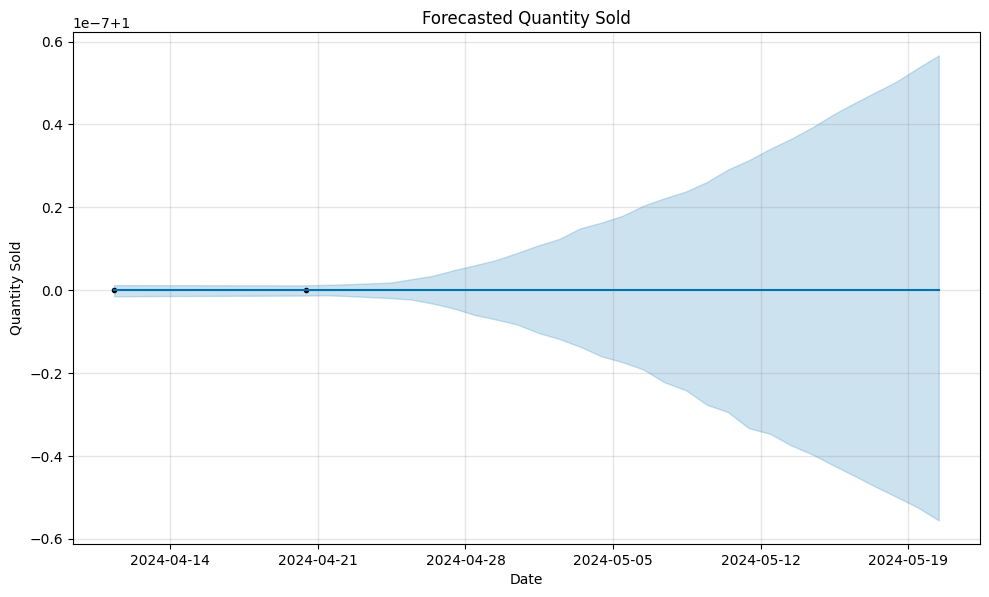

18:29:09 - cmdstanpy - INFO - Chain [1] start processing
18:29:10 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime()

2024-05-20T10:36:00.000000000


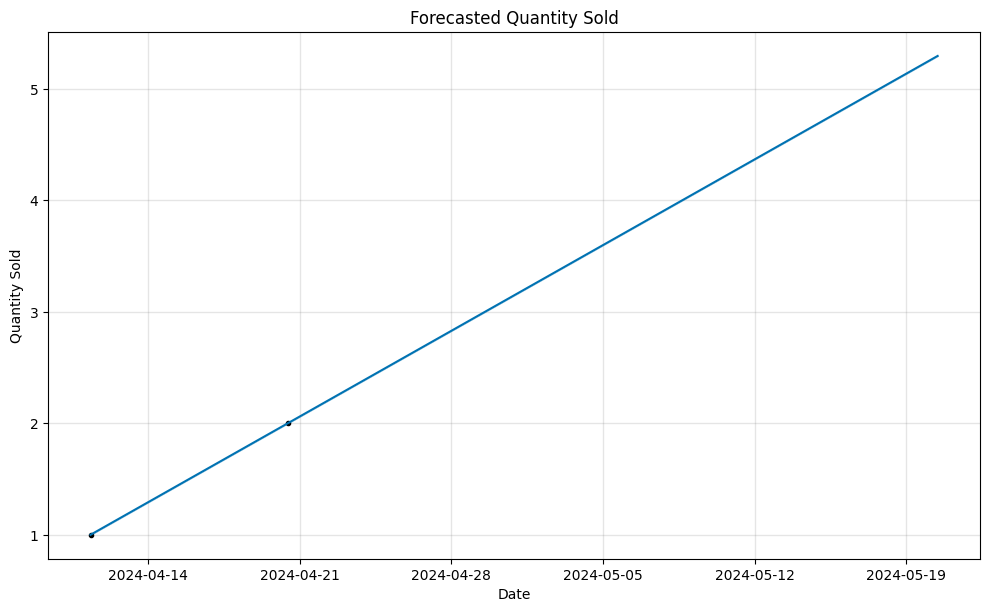

18:29:11 - cmdstanpy - INFO - Chain [1] start processing
18:29:13 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime()

2024-05-21T05:54:00.000000000


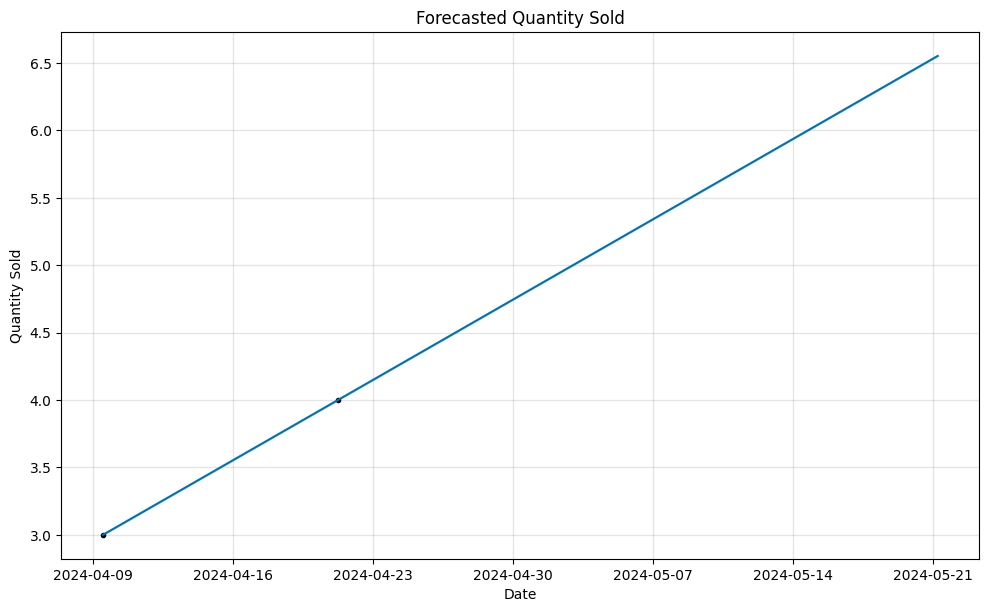

18:29:14 - cmdstanpy - INFO - Chain [1] start processing
18:29:16 - cmdstanpy - INFO - Chain [1] done processing


2024-05-22T08:05:00.000000000


C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


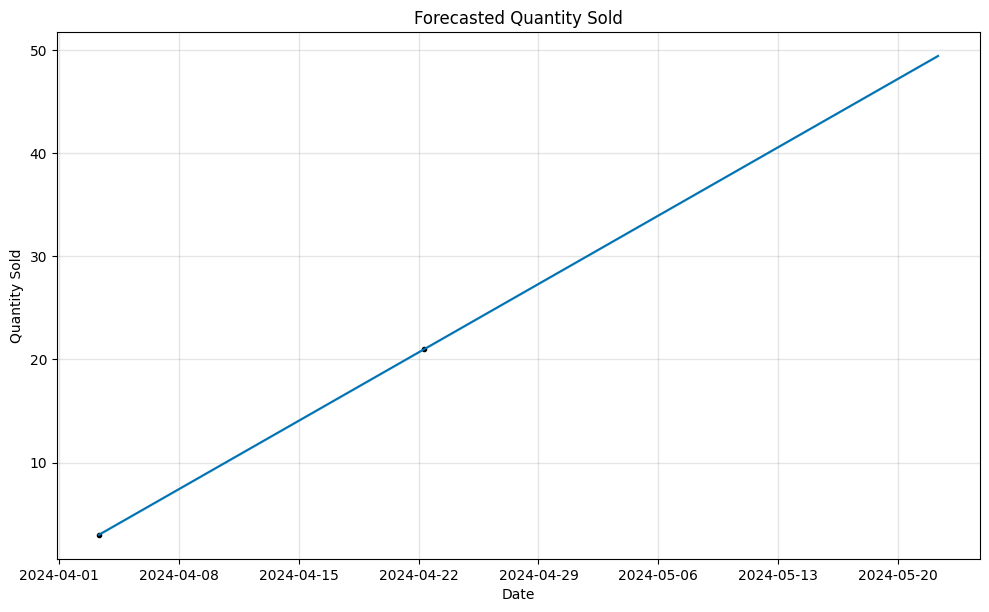

2024-05-19T07:36:00.000000000


C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


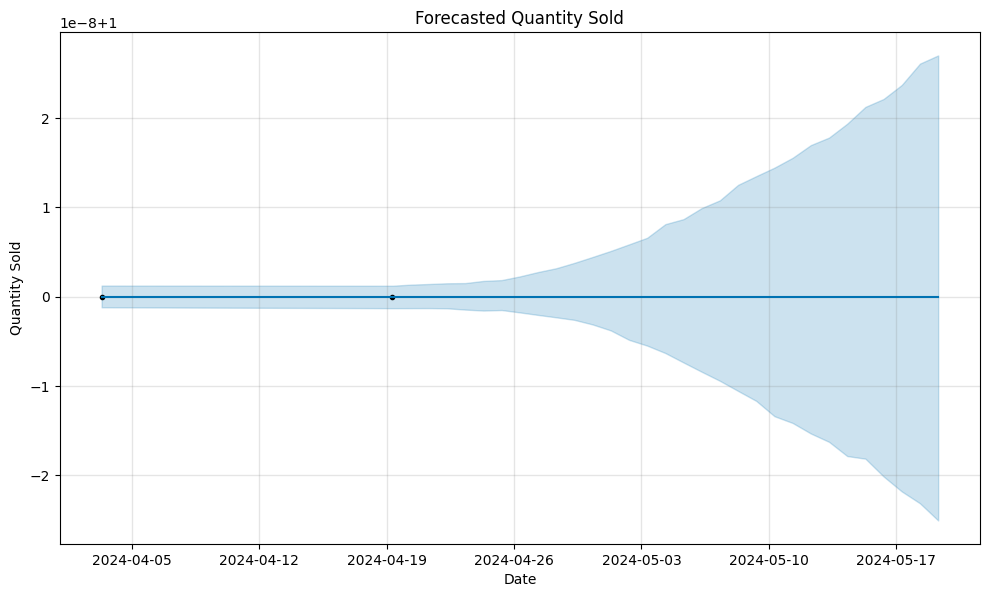

18:29:16 - cmdstanpy - INFO - Chain [1] start processing
18:29:17 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime()

2024-05-19T07:36:00.000000000


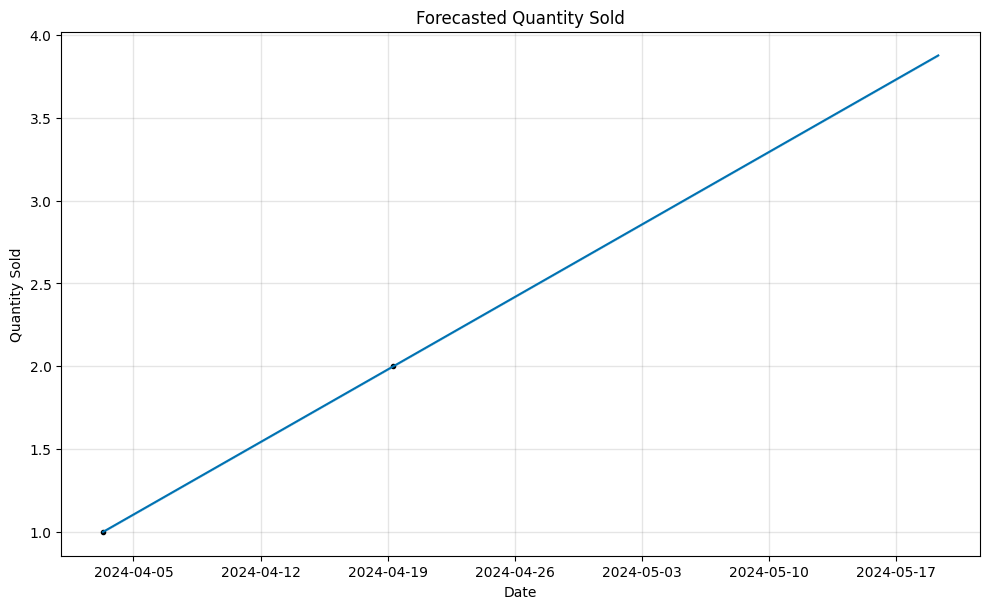

2024-05-12T05:35:00.000000000


C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


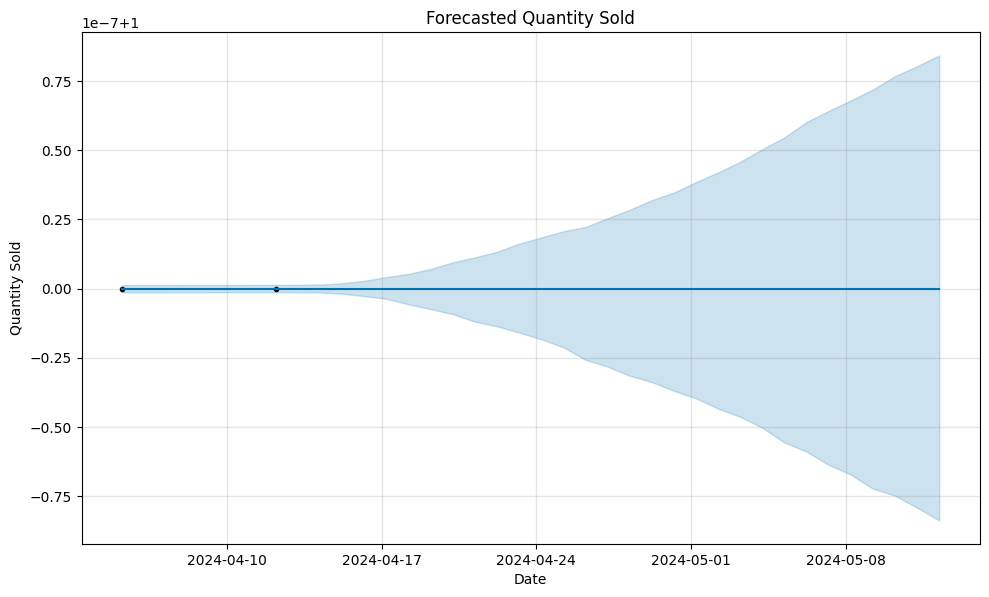

18:29:18 - cmdstanpy - INFO - Chain [1] start processing
18:29:19 - cmdstanpy - INFO - Chain [1] done processing


2024-05-23T08:50:00.000000000


C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


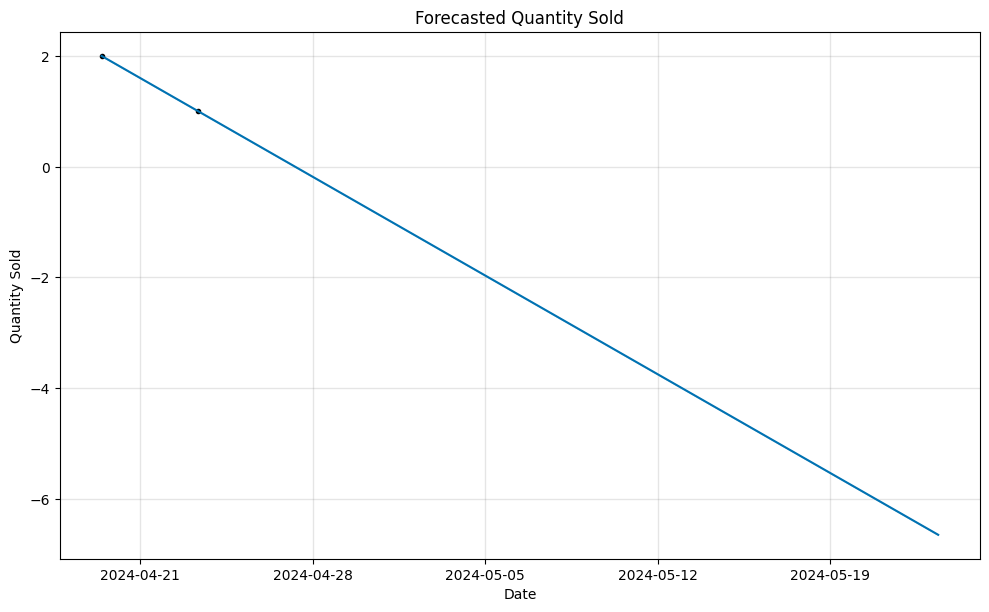

18:29:20 - cmdstanpy - INFO - Chain [1] start processing
18:29:21 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime()

2024-05-23T08:50:00.000000000


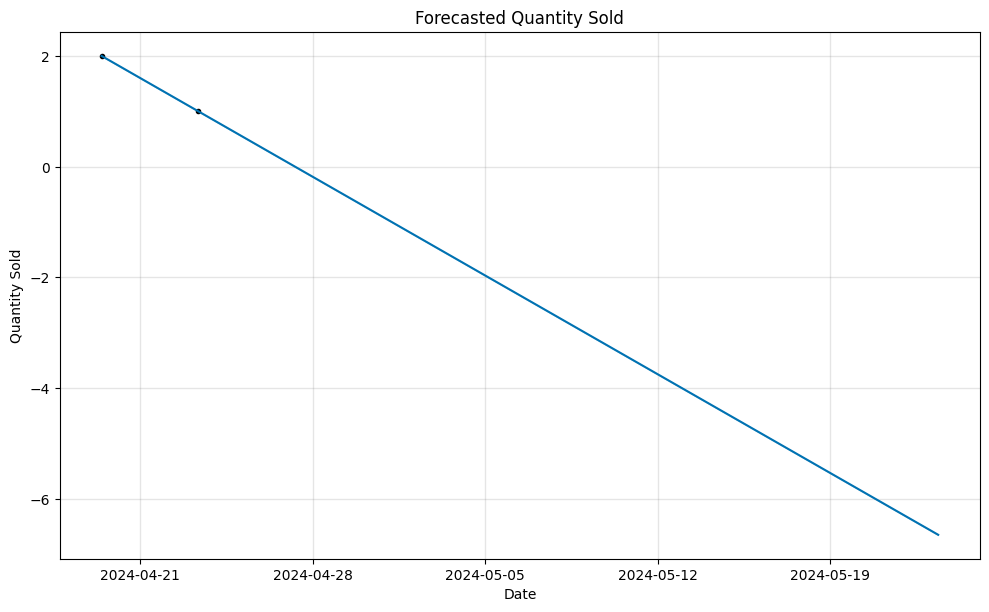

2024-05-10T07:30:00.000000000


C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


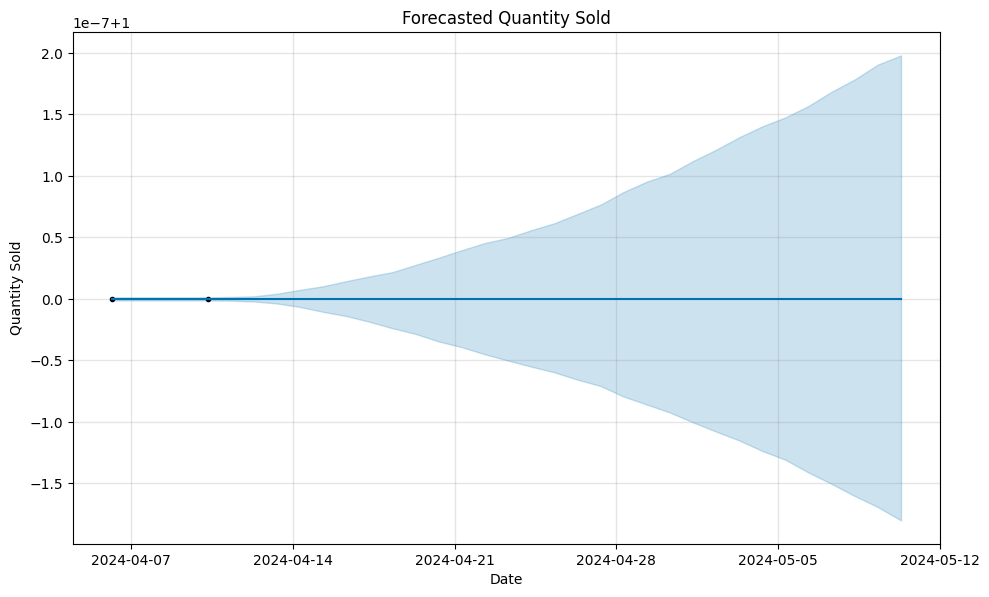

2024-05-03T05:25:00.000000000


C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\wndows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


KeyboardInterrupt: 

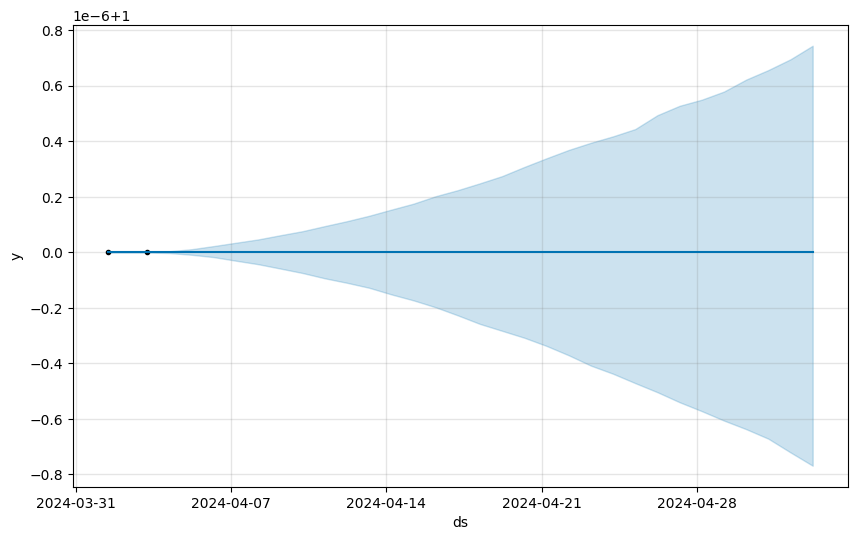

In [49]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

for customer_code in CustomerProductPurchase:
    for product_code, product_purchase in CustomerProductPurchase[customer_code].groupby('ProductCode'):
        if len(product_purchase) < 2:
            continue

        product_purchase['bill_datetime'] = pd.to_datetime(product_purchase['BillDate'] + " " + product_purchase['BillTime'], format='%d/%m/%Y %H:%M%p')

        # getting ready for model
        product_purchase.rename(columns={'bill_datetime': 'ds', 'Quantity': 'y'}, inplace=True)

        # Create a Prophet model
        model = Prophet()

        # Fit the model to your data
        model.fit(product_purchase)

        # Generate future dates for forecasting
        future_dates = model.make_future_dataframe(periods=30)  # Adjust 'periods' as needed

        # Make forecasts for the future dates
        forecast = model.predict(future_dates)
        next_purchase_date = forecast.loc[forecast['ds'] == forecast['ds'].max(), 'ds'].values[0]
        print(next_purchase_date)
        # Plot the forecasted values
        fig = model.plot(forecast)
        plt.xlabel('Date')
        plt.ylabel('Quantity Sold')
        plt.title('Forecasted Quantity Sold')
        plt.show()

## Seasonality

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Generate synthetic data with weekly and yearly seasonality
np.random.seed(0)
n_days = 365
dates = pd.date_range(start='2022-01-01', periods=n_days, freq='D')
sales_weekly = 100 + 10 * np.sin(np.arange(n_days) * (2 * np.pi / 7))  # Weekly seasonality
sales_yearly = 200 + 20 * np.sin(np.arange(n_days) * (2 * np.pi / 365))  # Yearly seasonality
sales_noise = np.random.normal(loc=0, scale=10, size=n_days)  # Random noise
sales = sales_weekly + sales_yearly + sales_noise

# Create a DataFrame with dates and sales
df = pd.DataFrame({'ds': dates, 'y': sales})

# Fit Prophet model with weekly and yearly seasonality
model = Prophet(seasonality_mode='multiplicative', daily_seasonality=False)
model.add_seasonality(name='weekly', period=7, fourier_order=3)
model.add_seasonality(name='yearly', period=365.25, fourier_order=10)

model.fit(df)

# Make future date predictions
future_dates = model.make_future_dataframe(periods=30)
forecast = model.predict(future_dates)

# Plot actual vs. predicted sales
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['ds'], df['y'], label='Actual')
ax.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
ax.set_title('Actual vs. Forecasted Sales with Seasonality')
ax.legend()
plt.show()


## ARIMA 

In [50]:
#next_purchase_date = forecast.loc[forecast['ds'] == forecast['ds'].max(), 'ds'].values[0]
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load your time series data into a DataFrame (assuming df is your DataFrame)
# Preprocess data as needed (e.g., set datetime index, handle missing values)


ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
num = 210
for customer_code in CustomerProductPurchase:
    for product_code in CustomerProductPurchase[customer_code]:
        for product_bill in CustomerProductPurchase[customer_code][product_code]:
            display(pd.DataFrame({
                'RegionName': product_bill['RegionName'],
                'StoreName': product_bill['StoreName'],
                'CustomerCode': product_bill['CustomerCode'],
                'ProductFullName': product_bill['ProductFullName'],
                'ProductCode': product_bill['ProductCode'], 
                'Quantity': product_bill['Quantity'],
                'BillNumber': product_bill['BillNumber'],
                'BillDate': product_bill['BillDate'],
                'BillTime': product_bill['BillTime']
            }))
    if num == 0:
        break
    num -= 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample data (replace this with your actual dataset)
data = {
    'time': pd.date_range('2022-01-01', periods=100),
    'quantity': np.random.randint(50, 200, 100),
    'sales': np.random.randint(1000, 5000, 100)
}
df = pd.DataFrame(data)

# Convert time to numeric values for regression (optional)
df['time_numeric'] = pd.to_numeric(df['time'])

# Perform linear regression
X = df[['time_numeric', 'quantity']]
y = df['sales']
model = LinearRegression().fit(X, y)

# Generate predicted sales values
df['predicted_sales'] = model.predict(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['time'], df['sales'], label='Actual Sales')
plt.plot(df['time'], df['predicted_sales'], color='red', label='Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Simple Linear Regression: Time vs. Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
for customer_product_data in CustomerProductPurchase:
    

In [ ]:
# how it all works lets understand
# different POS has different data so we gonna select that customer
# lets consider all 
# it's old thing dbscan, apriori, knn, kmeans, svm, decision tree
# feature analysis


# what her question was what you wanna understand, if she was data analysis, 
# firstly she would have known what there is to know
# 
# it also depends on Manufacturer type like forexample we are saleing one manufacturer,
# by taking frequency you are taking whole as a thing
# 
# one customer -> hasmany relation with different data type
# we consider as a week. on which day he will come


# we gonna make find pattern by making sliding windows
# we should be taking is frequency now 
# on top, price of product, 

# customer and it's relations
# 
# don't explain him
# why did i 


salesdetail_montly.describe()